In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image 
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set up the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/train',
        target_size=(224,224),
        batch_size=20,
        class_mode='binary')



test_datagen = ImageDataGenerator(rescale = 1./255, )

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/test',
        target_size=(224,224),
        batch_size=20,
        class_mode='binary')

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [4]:
import matplotlib.image as mpimg

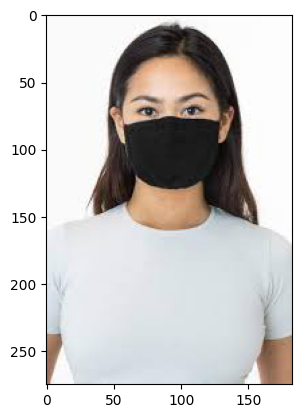

In [5]:
## Displaying the Image  of with_mask

img = mpimg.imread('/content/drive/MyDrive/dataset/train/with_mask/with_mask_1440.jpg')
imgplot = plt.imshow(img)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

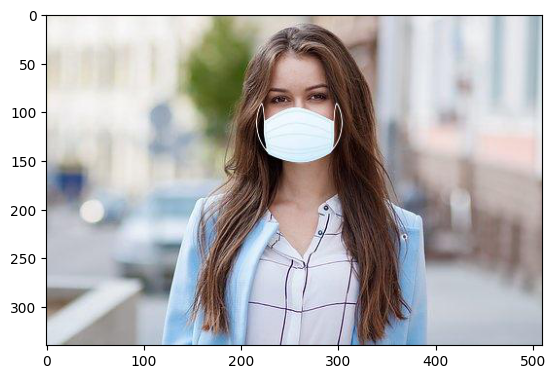

In [12]:
img = mpimg.imread('/content/drive/MyDrive/dataset/test/with_mask/with_mask_1441.jpg')
implot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

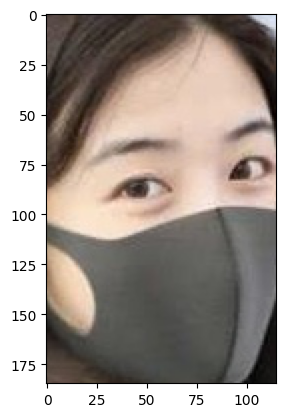

In [8]:
img = mpimg.imread('/content/drive/MyDrive/dataset/train/with_mask/with_mask_1391.jpg')
implot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

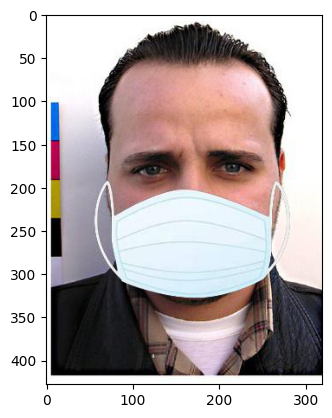

In [9]:
img = mpimg.imread('/content/drive/MyDrive/dataset/train/with_mask/with_mask_1543.jpg')
implot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

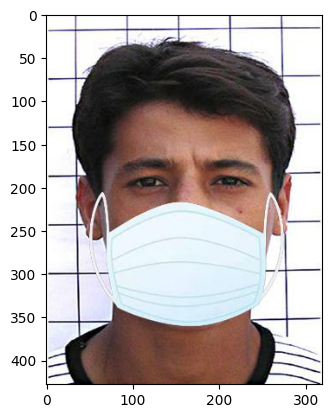

In [10]:
## Displaying the Image of With_mask
img = mpimg.imread('/content/drive/MyDrive/dataset/train/with_mask/with_mask_1029.jpg')
implot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

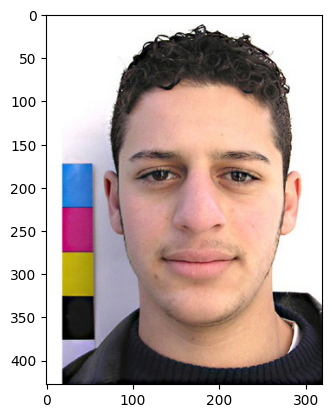

In [11]:
## Displaying a image of Without_Mask
img = mpimg.imread('/content/drive/MyDrive/dataset/train/without_mask/without_mask_1029.jpg')
implot = plt.imshow(img)
plt.show

In [13]:
# Define the model architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
num_of_classes = 2
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_of_classes, activation='sigmoid'))

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/15
169/303 [===============>..............] - ETA: 15s - loss: 0.5951 - acc: 0.7594

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


303/303 [==============================] - 48s 136ms/step - loss: 0.4970 - acc: 0.8012 - val_loss: 0.2583 - val_acc: 0.8921
Epoch 2/15
303/303 [==============================] - 42s 138ms/step - loss: 0.3094 - acc: 0.8790 - val_loss: 0.2180 - val_acc: 0.9133
Epoch 3/15
303/303 [==============================] - 41s 134ms/step - loss: 0.2395 - acc: 0.9116 - val_loss: 0.2035 - val_acc: 0.9166
Epoch 4/15
303/303 [==============================] - 41s 136ms/step - loss: 0.1733 - acc: 0.9331 - val_loss: 0.1905 - val_acc: 0.9232
Epoch 5/15
303/303 [==============================] - 37s 124ms/step - loss: 0.1583 - acc: 0.9447 - val_loss: 0.2267 - val_acc: 0.9179
Epoch 6/15
303/303 [==============================] - 38s 126ms/step - loss: 0.1290 - acc: 0.9527 - val_loss: 0.2331 - val_acc: 0.9239
Epoch 7/15
303/303 [==============================] - 37s 123ms/step - loss: 0.1249 - acc: 0.9565 - val_loss: 0.2367 - val_acc: 0.9252
Epoch 8/15
303/303 [==============================] - 38s 125ms/st

In [17]:
!nvidia-smi

Mon Apr 17 10:25:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    29W /  70W |   2911MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import cv2
from google.colab.patches import cv2_imshow

Path of the image to be predicted: drive/MyDrive/dataset/test/with_mask/with_mask_1036.jpg


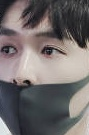

1/1 [==============================] - 0s 28ms/step
[[0.6498914  0.23501174]]
0
The person in the image is wearing a mask


In [20]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/drive/MyDrive/dataset/test/without_mask/without_mask_1157.jpg


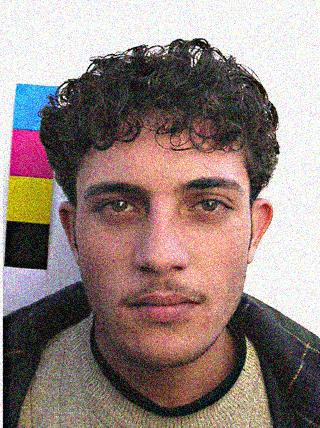

1/1 [==============================] - 0s 52ms/step
[[0.9995022  0.00535956]]
0
The person in the image is not wearing a mask


In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:
  
  print('The person in the image is not wearing a mask')

In [28]:
## Save Model

In [35]:
## Another Method to Save the Model

In [34]:
# # load the saved model from file
# with open('model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# # use the loaded model for prediction
# prediction = loaded_model.predict(test_generator)


In [ ]:
# # save it as a h5 file
# Model.save('Face_Mask.h5')   # with_Mask:1 , Without_Mask:0


In [ ]:
# Model =load_model("Face_Mask.h5")

In [33]:
import pickle 
pickle.dump(model , open("Model_save" , 'wb'))
model = pickle.load(open("Model_save" , 'rb'))
model.predict(test_generator)


76/76 [==============================] - 9s 115ms/step


array([[9.9533808e-01, 1.0281437e-02],
       [1.9337521e-01, 7.6620847e-01],
       [9.9883384e-01, 5.2394033e-03],
       ...,
       [9.9417144e-01, 1.3454623e-02],
       [1.0906195e-03, 9.9770588e-01],
       [4.8887893e-04, 9.9946672e-01]], dtype=float32)